In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *

warnings.filterwarnings("ignore")

In [15]:
dataset=read_csv("matches.csv")

In [16]:
dataset=dataset.drop(['umpire3'], axis=1)

**<font color=darkblue> Extracting the Umpires name from all the matches including "Umpire 1" and "Umpire 2" fields</font>**

In [17]:
temp=pd.melt(dataset, value_vars=['umpire1', 'umpire2'])

In [18]:
temp

,variable,value
0,umpire1,AY Dandekar
1,umpire1,A Nand Kishore
2,umpire1,Nitin Menon
3,umpire1,AK Chaudhary
4,umpire1,VK Sharma
5,umpire1,A Deshmukh
6,umpire1,Nitin Menon
7,umpire1,AK Chaudhary
8,umpire1,AY Dandekar
9,umpire1,Nitin Menon


**<font color=darkblue> Grouping the umpires based on number of matches they umpired and selecting the Top 10 </font>**

In [19]:
temp_series = temp.value.value_counts()[:10]

In [26]:
temp_series

S Ravi             97
HDPK Dharmasena    87
C Shamshuddin      65
AK Chaudhary       58
SJA Taufel         55
M Erasmus          54
Asad Rauf          51
BR Doctrove        42
RE Koertzen        41
CK Nandan          41
Name: value, dtype: int64

In [21]:
top_umpires=temp_series.index.tolist()
top_matches=temp_series.tolist()

**<font color=darkblue>Plotting the results as a Bar Graph using Matplotlib</font>**

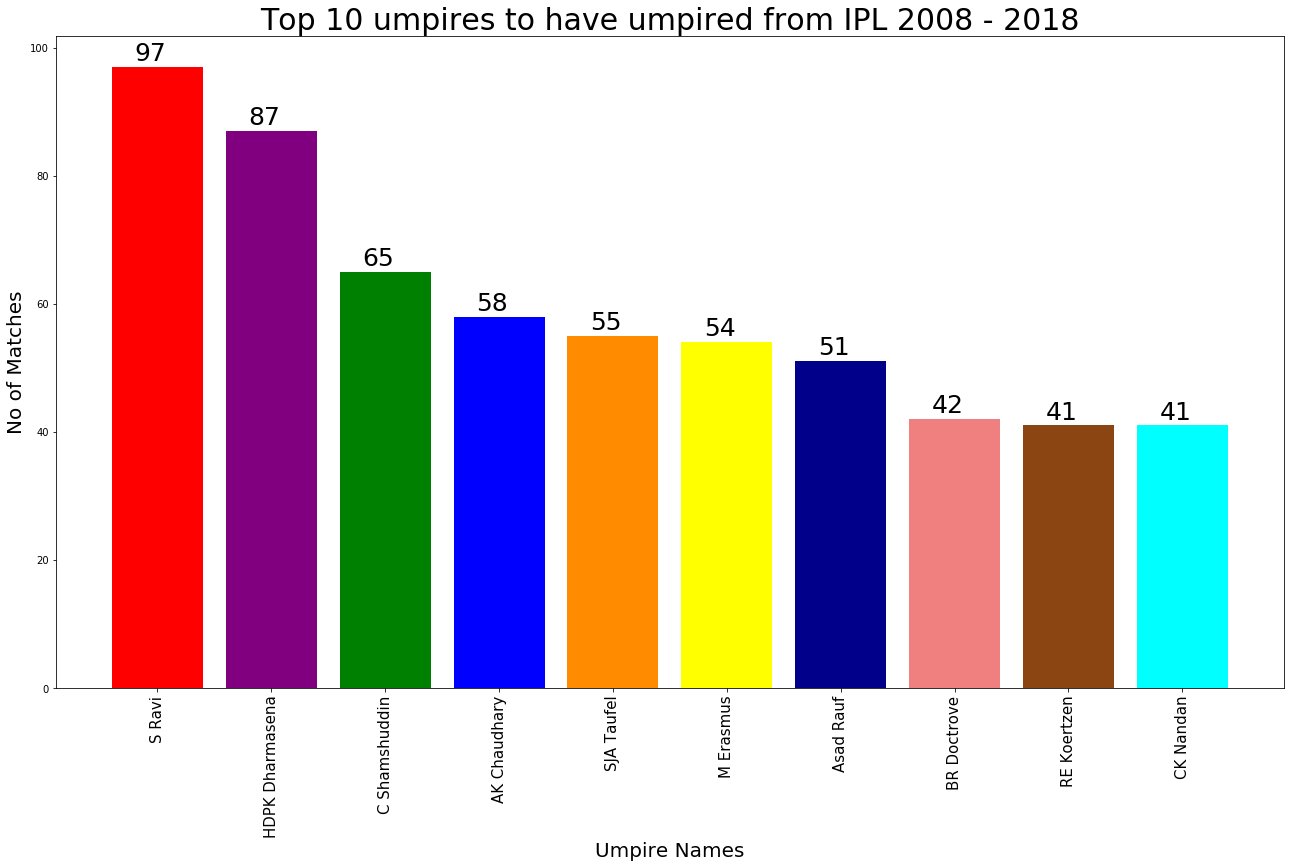

In [29]:
plt.figure(figsize=(22,12))
index = np.arange(len(temp_series.index))
bars=plt.bar(index, top_matches, color=['red','purple','green', 'blue', 'darkorange','yellow','darkblue','lightcoral','saddlebrown','cyan'])
plt.xlabel('Umpire Names', fontsize=20)
plt.ylabel('No of Matches', fontsize=20)
plt.xticks(index, top_umpires, fontsize=15, rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval +1, yval, fontsize=25)
    
plt.title('Top 10 umpires to have umpired from IPL 2008 - 2018', fontsize=30)
plt.show()